In [ ]:
#Sri Ganesh

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# ***Understand The Data***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


<Axes: >

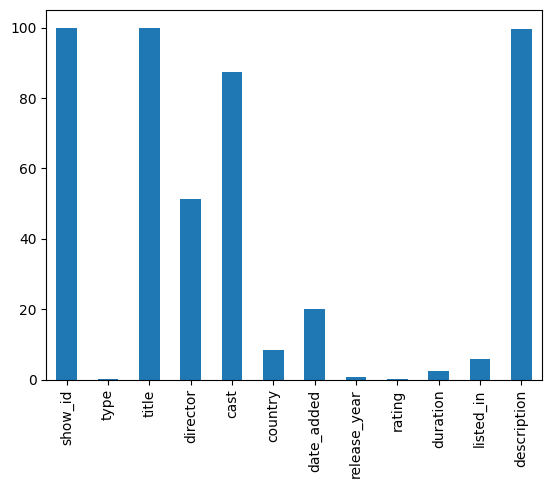

In [ ]:
unique_count = df.nunique()
print(unique_count)
(unique_count/df.shape[0]*100).plot(kind='bar')

In [ ]:
repeted_columns = ['type', 'director', 'cast', 'country', 'date_added','release_year', 'rating', 'duration', 'listed_in']
def plot_value_counts(i,repeted_column):
    a = i.value_counts()
    print(a)
    # fig = px.histogram(a,title=repeted_column,histnorm='percent')
    # fig.show()
    print('*'*100)
for i in repeted_columns:
  plot_value_counts(df[i],i)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
****************************************************************************************************
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64
****************************************************************************************************
cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, S

# **Analysis Of Missing Data**

1)Is data missing randomly or with a specific pattren

In [ ]:
#Data Columns With Missing Data
df.isna().sum()/df.shape[0]*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


--> How My Data Is Missing

<Axes: >

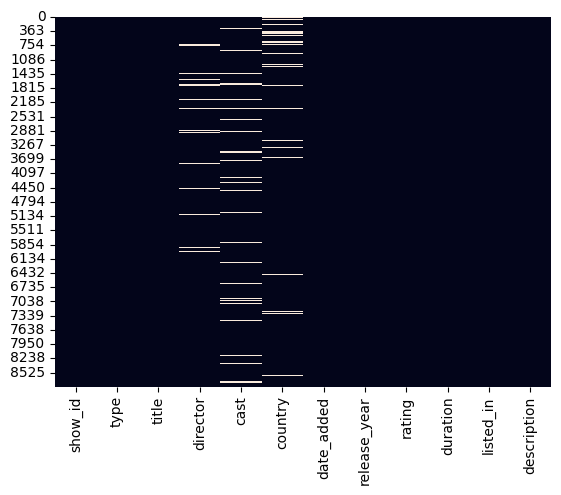

In [ ]:
sns.heatmap(df[df['type']=='Movie'].isna(),cbar=False)

less missing values in movies

<Axes: >

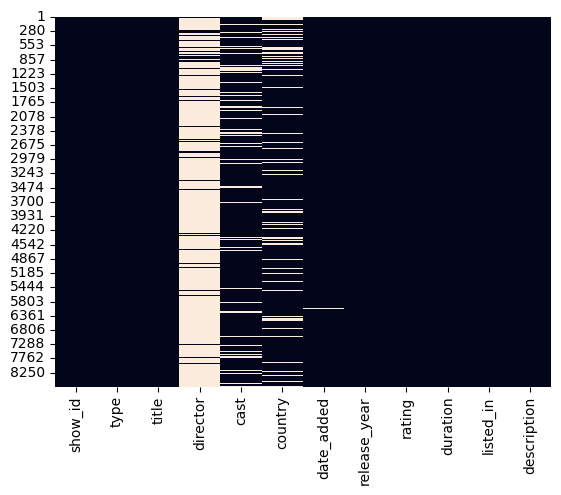

In [ ]:
sns.heatmap(df[df['type']=='TV Show'].isna(),cbar=False)

lot of missing values in series than movies

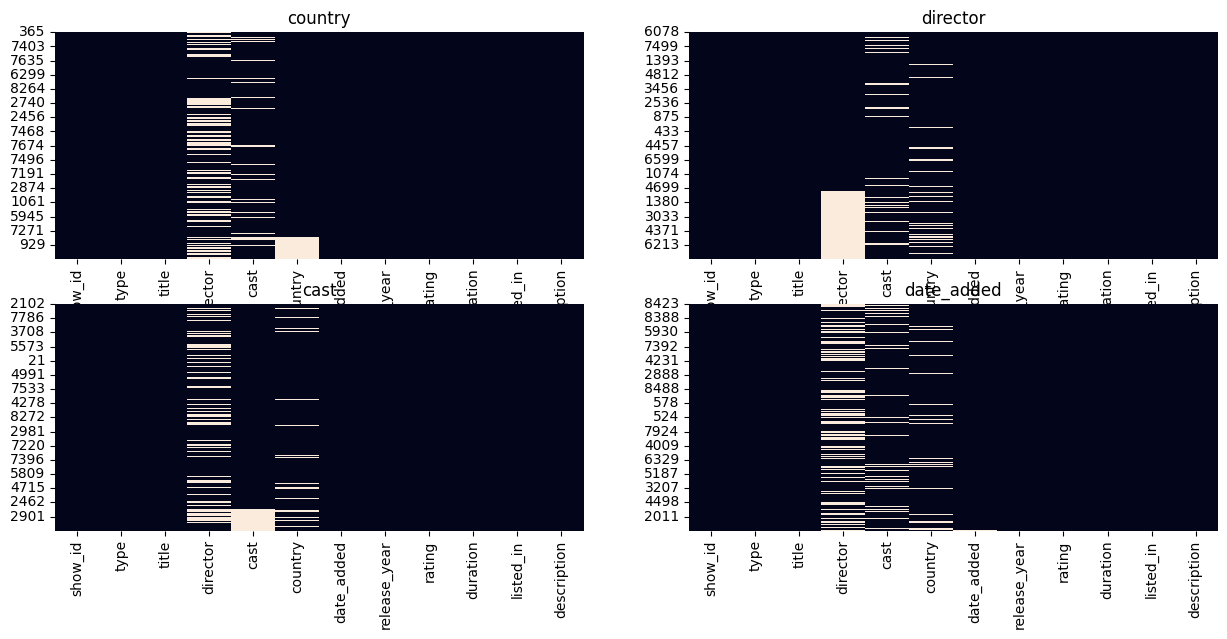

In [ ]:
loc = 1
fig = plt.figure(figsize=(15,10))
for i in ['country','director','cast','date_added']:
  plt.subplot(3,2,loc)
  sns.heatmap(df.sort_values(i).isna(),cbar=False)
  plt.title(i)
  loc+=1

plt.show()



1.   The Data Is Missing In Random
2.   Lot Of missing data in Director Column



In [ ]:
#duration--
df.loc[df['duration'].isna()] #3 Nulls But Mis-Enterd in rating

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df['duration1'] = df['duration']

In [ ]:
df.loc[df['duration'].isna(),'duration'] = df.loc[df['duration'].isna(),'rating'] #copy the info

In [ ]:
#Replace MisEnterd Rating to None
df.loc[df['duration1'].isna(),'rating'] = None

In [ ]:
df['duration'].isna().sum()

0

In [ ]:
#rating
df['rating'].isna().sum()

7

In [ ]:
df[df['rating'].isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration1
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,None,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi...",NaN
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,None,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...,NaN
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,None,66 min,Movies,The comic puts his trademark hilarious/thought...,NaN
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,37 min
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",1 Season


In [ ]:
#Understanding How listed_in is Related to rating
df.groupby('listed_in')['rating'].sum().head()

,rating
listed_in,
Action & Adventure,RRRRRTV-MARPG-13RRRRPG-13PG-13RPG-13RRRRRRRTV-...
"Action & Adventure, Anime Features",TV-MA
"Action & Adventure, Anime Features, Children & Family Movies",TV-PGPGTV-PGTV-14
"Action & Adventure, Anime Features, Classic Movies",TV-14PG-13
"Action & Adventure, Anime Features, Horror Movies",TV-MA


In [ ]:
#date_added
df['date_added'].value_counts().head()

,count
date_added,
"January 1, 2020",109
"November 1, 2019",89
"March 1, 2018",75
"December 31, 2019",74
"October 1, 2018",71


In [ ]:
#Convert Date TO DateTime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(),errors='coerce')


In [ ]:
df['date_added'].isna().sum()

10

We Can Ignore The Nulls has  They are small in number

In [ ]:
#convert relese year to int
df['release_year'] = df['release_year'].astype(int)

In [ ]:
#add month,day,year and weekday columns
df['month'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()
df['year'] = df['date_added'].dt.year
df['day'] = df['date_added'].dt.day_name()
df['week'] = df['date_added'].dt.weekday

In [ ]:
df['delay'] = df['year']-df['release_year']
df['delay'].value_counts()

,count
delay,
0.0,3241
1.0,1585
2.0,714
3.0,491
4.0,367
...,...
-2.0,1
93.0,1
60.0,1


In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
} #from chat-gpt tv ratings converted
df['target'] = df['rating'].replace(ratings_ages)

In [ ]:
#fill all the null values
# country  --> we can use the mode
# director --> we cant impute so fill as no Value
# cast --> we cant impute so fill as no Value
df['country']=df['country'].fillna(df['country'].mode()[0])
df['director']=df['director'].fillna('No Value')
df['cast']=df['cast'].fillna('No Value')

# Understanding Nested *Columns*

In [ ]:
#country
country = df['country'].str.strip().str.split(',').explode()
country = country.str.strip()
country.head()

,country
0,United States
1,South Africa
2,United States
3,United States
4,India


In [ ]:
country_df=df.assign(country=df['country'].str.strip().str.split(',')).explode('country').reset_index()
country_df['country'] = country_df['country'].str.strip()



In [ ]:
country_df[country_df.duplicated()]

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,...,listed_in,description,duration1,month,month_name,year,day,week,delay,target


In [ ]:
plot_value_counts(country,'country')

country
United States     4521
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 123, dtype: int64
****************************************************************************************************


In [ ]:
#listed_in

listed_df=df.assign(listed_in=df['listed_in'].str.strip().str.split(',')).explode('listed_in').reset_index()
listed_df['listed_in'] = listed_df['listed_in'].str.strip()



In [ ]:
#director
df['director'].value_counts()
df['count_dir']=df['director'].str.split(',').apply(lambda x:len(x))
px.histogram(df['count_dir'])



we can observe lot of values so needs unnesting

In [ ]:
#director unnest
director_df=df[['director','show_id']].assign(director=df['director'].str.strip().str.split(',')).explode('director').reset_index()
director_df['director'] = director_df['director'].str.strip()

director_df.head()

,index,director,show_id
0,0,Kirsten Johnson,s1
1,1,No Value,s2
2,2,Julien Leclercq,s3
3,3,No Value,s4
4,4,No Value,s5


In [ ]:
#Cast
cast_df=df[['cast','show_id']].assign(cast=df['cast'].str.strip().str.split(',')).explode('cast').reset_index()
cast_df['cast'] = cast_df['cast'].str.strip()
cast_df.head()

,index,cast,show_id
0,0,No Value,s1
1,1,Ama Qamata,s2
2,1,Khosi Ngema,s2
3,1,Gail Mabalane,s2
4,1,Thabang Molaba,s2


# ***Divide The Date into movies and series***

In [ ]:
movies = df[df['type']=='Movie']
series = df[df['type']=='TV Show']

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']

In [ ]:
df['type'].value_counts()/df.shape[0]*100

,count
type,
Movie,69.615079
TV Show,30.384921


70% movies and 30% series



# ***Analysis ***

In [ ]:
#top 10 Country's:
top_10_country = country.value_counts()[:10]
px.bar(top_10_country,text_auto=True)

In [ ]:
#top 10 Country's:
top_10_bottom_country = country.value_counts()[-10:]
fig = px.bar(top_10_bottom_country,text_auto=True)
fig.show()

In [ ]:
#How Top_10 is Related TO Last 20 to 40 Years
top_10_country_df = country_df[country_df['country'].isin(top_10_country.index)]
fig = px.histogram(top_10_country_df.sort_values('date_added'),x='country',color='type',animation_frame=top_10_country_df['date_added'].dt.year,text_auto=True)
fig.show()

In [ ]:
title = "Percentage OF target audience In Top 10 Countrys"
a = top_10_country_df.groupby(['country','target'])['show_id'].count().reset_index()
a['sum'] = a.groupby(['country'])['show_id'].transform('sum')
a['per']=a['show_id']/a['sum']
px.bar(a.sort_values(['target','per']),y='country',x='per',color='target',text_auto='.0%',title=title)

*  india has lot of teen shows
* spain focus on adult shows

In [ ]:
title = "Percentage OF Movies/Series In Top 10 Countrys"
a = top_10_country_df.groupby(['country','type'])['show_id'].count().reset_index()
a['sum'] = a.groupby(['country'])['show_id'].transform('sum')
a['per']=a['show_id']/a['sum']
px.bar(a.sort_values(['type','per']),y='country',x='per',color='type',text_auto='.0%',title=title)



*   we can see different countries have different distribution
*   south korea has more series than movies
*  in india Netflix has to focus on releasing tv shows




In [ ]:
def abc(x):
  return x.drop_duplicates(['show_id'])['delay'].mean()
title = "Avg Movies Delay in Each Country From Relese to Upload"
a = top_10_country_df[top_10_country_df['type']=='Movie'].groupby(['country'],as_index=False).apply(abc)
a.columns = ['country','delay']
px.bar(a.sort_values('delay'),y='country',x='delay',text_auto='.0',title=title)

India and Germany has the 7 years gap in movie relese and upload

In [ ]:
title = "Avg Series Delay in Each Country From Relese to Upload"
a = top_10_country_df[top_10_country_df['type']=='TV Show'].groupby('country',as_index=False).apply(abc)
a.columns = ['country','delay']
px.bar(a.sort_values('delay'),y='country',x='delay',text_auto='.0',title=title)

*  In Series release and Upload gap is low compared to movies
*  In Japan the delay is high

In [ ]:
exp = '% of the movies are relesed in top_10 Countryes {}'.format(top_10_country.index)
print(top_10_country_df.shape[0]/df.shape[0]*100,exp)

95.23106619734301 % of the movies are relesed in top_10 Countryes Index(['United States', 'India', 'United Kingdom', 'Canada', 'France', 'Japan',
       'Spain', 'South Korea', 'Germany', 'Mexico'],
      dtype='object', name='country')


In [ ]:
count_country= country.value_counts()
print("In {} number of movies released are {} which is {}%".format(count_country.index[0],count_country.iloc[0],count_country.iloc[0]/df.shape[0]*100))

In United States number of movies released are 4521 which is 51.33416600431475%


In [ ]:
per_country = count_country/df.shape[0]*100
print("Top 2 Countries relese {}% of Movies".format(per_country[:2].sum()))

Top 2 Countries relese 63.21108209378903% of Movies


In [ ]:
title = "Average Number OF movies Relesed in a year in top_10 countryes"
num_mov = top_10_country_df.groupby(['country','year'])['month'].count().reset_index()

In [ ]:
px.bar(num_mov.groupby('country')['month'].mean().round(0).sort_values(ascending=False),text_auto=True,title=title)

In [ ]:
title = "Top 5 Countrys Number Of Movies over Time"
fig = px.line(num_mov[num_mov['country'].isin(count_country[:5].index)],x='year',y='month',color='country',markers=True,title=title)

fig.show()



*   We Can Cearly see that in pandamin the number goes down (trend)

*   Peak is in in 2019



In [ ]:
num_week = top_10_country_df.groupby(['country','week'])['month'].count().reset_index()

In [ ]:
title = "Top 5 Countrys Number Of Movies relesed on weekday"
px.line(num_week[num_week['country'].isin(count_country[:5].index)],x='week',y='month',color='country',markers=True,title=title)



*   we can observe sudden spike in number of movies released on Friday





In [ ]:
#Lets Understand How ratio of movies and series changes over time
type_group = df.groupby(['year','type'])['month'].count().reset_index()


In [ ]:
title = "NUmber Of Movies and Series produced every year Year"
px.line(type_group,x='year',y='month',color='type',title=title)

number movies and series are increasing over time

In [ ]:
type_group['cumsum'] = type_group.groupby('type')['month'].cumsum()
title = "CumSum Of Movies and Series produced every year Year"
px.line(type_group,x='year',y='cumsum',color='type',title=title)

Movies Are Increasing Rapidly Than Series

In [ ]:
type_group['perce']=type_group.groupby('year')['month'].transform(sum)
type_group['perce']=(type_group['month']/type_group['perce'])
title = "Percentage Of Movies and Series produced every year Year"
px.bar(type_group.sort_values(['type','perce']),x='year',y='perce',color='type',title=title,text_auto='.0%')


all the years we have series less than 40% netflix uploading more movies compared to series

In [ ]:
title="Percentage Of Target audians for each year"
type_group = df.groupby(['year','target'],as_index=True)['month'].count().reset_index()
type_group['perce']=type_group.groupby('year')['month'].transform(sum)
type_group['perce']=(type_group['month']/type_group['perce'])
title = "Percentage Of Movies and Series produced every year Year"
px.bar(type_group.sort_values(['target','perce']),x='year',y='perce',color='target',title=title,text_auto='.0%')

in recent years the distribution remains same

In [ ]:
#What is the best time to launch a TV show?
title="Distribution of number movies and series relesed in each day"
px.histogram(df,x='week',color='type',title=title,text_auto=True)

On Friday We Are Seeing lot Of releases

In [ ]:
title="Distribution of number movies and series relesed in each Month"
px.histogram(df.sort_values('month'),x='month_name',color='type',title=title,text_auto=True)

Netflix Is Uploading more in jan,july,dec

In [ ]:
#Director Mearge
dir_df = director_df.merge(df,on='show_id',how='left')
dir_df.head()

,index,director_x,show_id,type,title,director_y,cast,country,date_added,release_year,...,description,duration1,month,month_name,year,day,week,delay,target,count_dir
0,0,Kirsten Johnson,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Value,United States,2021-09-25,2020,...,"As her father nears the end of his life, filmm...",90 min,9.0,September,2021.0,Saturday,5.0,1.0,Teens,1
1,1,No Value,s2,TV Show,Blood & Water,No Value,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,...,"After crossing paths at a party, a Cape Town t...",2 Seasons,9.0,September,2021.0,Friday,4.0,0.0,Adults,1
2,2,Julien Leclercq,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,...,To protect his family from a powerful drug lor...,1 Season,9.0,September,2021.0,Friday,4.0,0.0,Adults,1
3,3,No Value,s4,TV Show,Jailbirds New Orleans,No Value,No Value,United States,2021-09-24,2021,...,"Feuds, flirtations and toilet talk go down amo...",1 Season,9.0,September,2021.0,Friday,4.0,0.0,Adults,1
4,4,No Value,s5,TV Show,Kota Factory,No Value,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,...,In a city of coaching centers known to train I...,2 Seasons,9.0,September,2021.0,Friday,4.0,0.0,Adults,1


In [ ]:
#Analysis of actors/directors of different types of shows/movies.
count_dir=dir_df['director_x'].value_counts()
px.histogram(count_dir[1:])

Most Of The Directors Directed single Movie or series

<Axes: xlabel='director_x'>

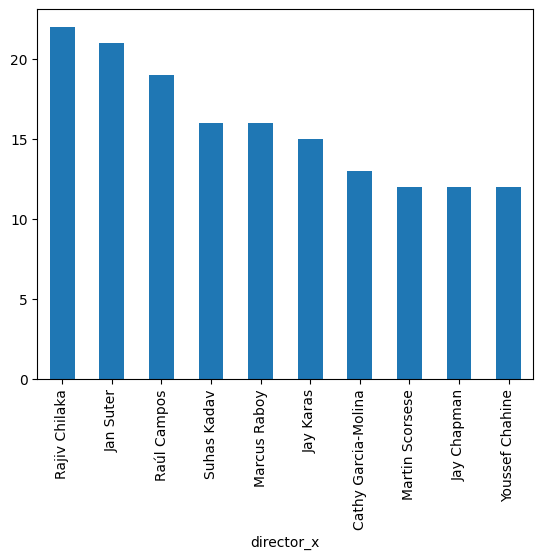

In [ ]:
top_10_dir=count_dir[1:11]
top_10_dir.plot(kind='bar')

In [ ]:
top_10_dir_df = dir_df[dir_df['director_x'].isin(top_10_dir.index)]
top_10_dir_df['type'].value_counts()

,count
type,
Movie,157
TV Show,1


so Needs A seperate Movies Top 10 And Series TOp 10

In [ ]:
#Movies Top 10 Directors
movies_top_10_dir = dir_df[dir_df['type']=='Movie']['director_x'].value_counts()[1:11]
series_top_10_dir = dir_df[dir_df['type']=='TV Show']['director_x'].value_counts()[1:11]


In [ ]:
movies_top_dir_df = dir_df[dir_df['director_x'].isin(movies_top_10_dir.index)]
series_top_dir_df = dir_df[dir_df['director_x'].isin(series_top_10_dir.index)]

<Axes: xlabel='director_x'>

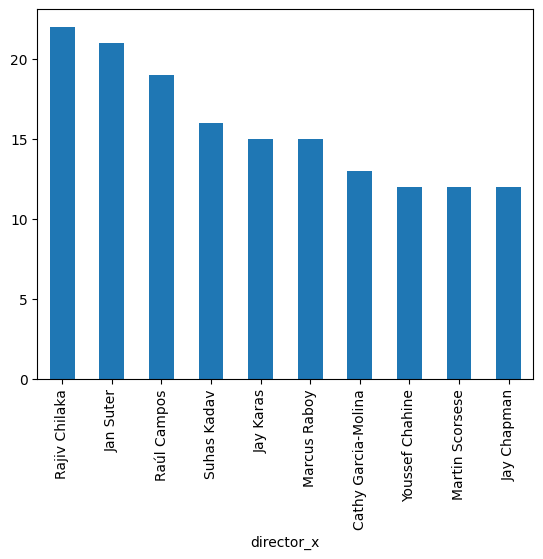

In [ ]:
movies_top_10_dir.plot(kind='bar')

Top Directors

2446 188


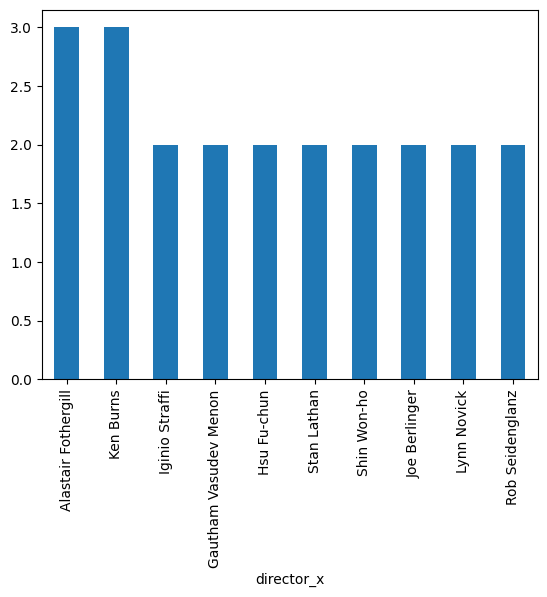

In [ ]:
series_top_10_dir.plot(kind='bar')
print((series['director']=='No Value').sum(),(movies['director']=='No Value').sum())

lot of null values so above may not be true

In [ ]:
#rating and target
title = "number of Movies and Series in rating and target category"
a = df.groupby(['type','target'],as_index=False)['rating'].count()
a['sum'] = a.groupby(['target'])['rating'].transform('sum')
a['per']=(a['rating']/a['sum'])
px.bar(a.sort_values(['type','per']),x='per',y='target',color='type',text_auto='.0%',title=title)

*  We Have more adult and teen movies and series
* In Kids category series are more common than movies

In [ ]:
count_genre = listed_df['listed_in'].value_counts()
count_genre.head()

,count
listed_in,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869


In [ ]:
px.bar(count_genre[:10],text_auto=True)

In [ ]:
title = "Famous Genre in Each top 10 Countr's For Movies"
a = listed_df[(listed_df['type']=='Movie') & (listed_df['country'].isin(top_10_country.index)) ].groupby(['country','listed_in'])['title'].count().reset_index()
px.sunburst(a,path=['country','listed_in'],values='title',title=title)

* International Movies and Drams are popular in India
* Dramas Comedy and Documentary are Popular Genre In US

In [ ]:
title = "Famous Genre in Each top 10 Countr's For Series"
a = listed_df[(listed_df['type']=='TV Show') & (listed_df['country'].isin(top_10_country.index)) ].groupby(['country','listed_in'])['title'].count().reset_index()
px.sunburst(a,path=['country','listed_in'],values='title',title=title)

* TV Comedies and Dramas are Popular in US
* Brtish TV Shows in UK

In [ ]:
title = "Each Year Genre For Movies"
a = listed_df[listed_df['type']=='Movie'].groupby(['year','listed_in'])['title'].count().reset_index()
px.sunburst(a,path=['year','listed_in'],values='title',title=title)

* International Movies
* Drama
* Comedy
* Action and Adventures

Are popular in Movies all Years



In [ ]:
title = "Each Year Genre For Series"
a = listed_df[listed_df['type']=='TV Show'].groupby(['year','listed_in'])['title'].count().reset_index()
px.sunburst(a,path=['year','listed_in'],values='title',title=title)

* International TV Shows
* TV Dramas
* TV comedys
* TV Kinds
Are Popouler in Series All Years

In [ ]:
title = "Number Of Movies in Each Genre"
movies_genre = df[df['type']=='Movie']['listed_in'].str.replace(', ',',').replace(' ,',',').str.split(',').explode()
top_movies_genre = movies_genre.value_counts()[:10]
px.bar(top_movies_genre,text_auto=True,title=title)

In [ ]:
title = "Number Of Series in each genre"
series_genre = df[df['type']=='TV Show']['listed_in'].str.replace(', ',',').replace(' ,',',').str.split(',').explode()
top_series_genre = series_genre.value_counts()[:10]
px.bar(top_series_genre,text_auto=True,title=title)

In [ ]:
#duration
title = "Movie Duration distribution"
movies['duration1'] = movies['duration'].str.split(' ').apply(lambda x:int(x[0]))
px.histogram(movies['duration1'],text_auto=True,title=title)

More Movies Are more Than around 100 min

In [ ]:
title = "Seasons distribution"
px.histogram(series['duration'],text_auto=True,title=title)

Most number of series are 1,2,3,4 seasons long

In [ ]:
#Cast
cast_list = df[df['type']=='Movie']['cast'].dropna().str.split(',').sum()
top_cast = pd.Series(cast_list).value_counts()[1:11]
title = "Top Cast in Movies"
px.bar(top_cast,title = title,text_auto=True)

In [ ]:
#Cast
cast_list = df[df['type']=='TV Show']['cast'].dropna().str.split(',').sum()
top_cast = pd.Series(cast_list).value_counts()[1:11]
title = "Top Cast in Series"
px.bar(top_cast,title = title,text_auto=True)

# **Insights:-**
1. Netflix has more movies (70%) than TV shows (30%), suggesting a preference for single-consumption content.
2. Content additions peaked in 2020, likely due to the COVID-19 pandemic.
3. The USA contributes the most content (60%), showing a Western focus.
4. 'Drama,'Comedy','international TV Showa' are the most common genres, catering to broad tastes.
5. "TV-MA" rated content dominates, indicating a strong adult audience base.
6. Movies average 90-120 minutes, while most TV shows have 1-2 seasons.
7. South Korea excels in "Thriller" and "Romance" driven by the global popularity of K-dramas.
8. Recent additions include more family-friendly titles, hinting at a strategy shift.
9. Most content originates from the 2010s

# **Recommendations:-**
1. Target Emerging Markets: Invest in countries like South Korea and India.
2. Expand TV Shows: Develop more episodic content for better viewer retention.
3. Diversify Genres: Focus on underrepresented genres to attract niche audiences.
4. Family Content: Add more kid-friendly and family-oriented shows

In [ ]:
print("Thank You")

Thank You


_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________